<b> MIS 382N: ADVANCED MACHINE LEARNING<b>

Assignment 5

Total points: 55

Due:  to be submitted via Canvas by 11:59 pm, Mon Nov 21st.

Your homework should be written in a python notebook. If you prefer, you can work in groups of two. **Please note that only one student per team needs to submit the assignment on Canvas but make sure to include both students' names and UT EIDs.**

For any question that requires a handwritten solution, you may upload scanned images of your solution in the notebook or attach them to the assignment . You may write your solution using markdown as well.

Please make sure your code runs and the graphs and figures are displayed in your notebook before submitting. (%matplotlib inline)

**Additionally, upload any images you plan to incorporate in your notebook as attachments so we can see them in case the uploaded images don't appear properly on our end.**

**This can be an individual assignment or group of 2. If you choose to do it as a group, please specify who you are working with (name and EID), then only one student should submit the homework. Put your name and eid here.**

Name: Parthiv Borgohain

EID: pb25347

Name: Manvi Goyal

EID: mg65952

# Question 1: Ensemble Methods [10 pts]
Read this [article](https://towardsdatascience.com/catboost-vs-light-gbm-vs-xgboost-5f93620723db) on different boosting methods. Briefly describe the main advantages and disadvantages of  CatBoost as compared to XGBoost.

### Answer:

Advantages and Disadvantages of CatBoost over XGBoost:

a) XGBoost is usually good for all type of datasets whereas CatBoost performs very well for categorical data. CatBoost does the one hot encoding automatically by using parameter one_hot_max_size and it offers variety of ways to do that. The parameter performs one hot encoding for all the categorical features. 

b) CatBoost is the best model both for accuracy and time for categorical variables if the dataset is properly encoded and tuned.

c) Both these models differ in way the trees are built. CatBoost built tress that are symmetric i.e. balanced but this is not true for XGBoost. The symmetric tree has a lot of benefits like it aids in efficient CPU implementation which reduces the prediction time, makes swift model appliers, and controls overfitting as the structure serves as regularization. Hence, due to this CatBoost is generally faster than XGBoost.

d) XGBoost uses the classic boosting whereas CatBoost uses ordered boosting. Classic boosting has a problem called prediction shift due to which it is more prone to overfitting on small datasets. The algorithms does not leave a chance of experiencing unseen data as they use same data instance that model was built with. In comparison, CatBoost has a permutation-driven approach for training the model on subset of data. The overfitting and leakage is prevented because residuals are calculated on another subset of data.

e) To prevent overfitting CatBoost has overfitting detector which can stop training earlier.

f) To process missing values, CatBoost has 3 missing value strategies.

g) XGBoost has some more generalization capabilities than other boosting techniques

# Question 2 : Ensemble Methods for Classification [25 pts]

We look at the following dataset [GiveMeSomeCredit](https://www.kaggle.com/c/GiveMeSomeCredit) for this question. The dataset is extremely large so for this question we only consider a subset of the data which has been provided along with the notebook for this assignment.
The task is to predict the probability that someone will experience financial distress in the next two years. The dataset has already been split into train and test sets.

In [ ]:
# Only use this code block if you are using Google Colab.
# If you are using Jupyter Notebook, please ignore this code block. You can directly upload the file to your Jupyter Notebook file systems.
from google.colab import files

## It will prompt you to select a local file. Click on “Choose Files” then select and upload the file. 
## Wait for the file to be 100% uploaded. You should see the name of the file once Colab has uploaded it.
uploaded = files.upload()

In [1]:
import pandas as pd

data = pd.read_csv('hw5_data.csv')
data.drop(data.columns[data.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
data.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0,0.571373,66,0,0.430620,9274.0,10,0,1,0,0.0
1,0,0.233999,56,0,0.257380,5656.0,12,0,0,0,0.0
2,0,0.299270,33,0,0.114575,4747.0,8,0,0,0,3.0
3,0,0.032165,41,0,0.308326,8490.0,8,0,1,0,0.0
4,0,0.050591,36,0,0.862627,3333.0,8,0,2,0,0.0


In [2]:
from sklearn.model_selection import train_test_split
y = data['SeriousDlqin2yrs']
X = data.drop(['SeriousDlqin2yrs'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 7)

print('train',X_train.shape,y_train.shape)
print('test',X_test.shape,y_test.shape)

train (3750, 10) (3750,)
test (1250, 10) (1250,)


In this question, we will compare performance of different ensemble methods for classification problems: [Bagging](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html), [AdaBoost](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html), and [Random Forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) Classifiers.

a) **[2.5 pts]** Use a Decision Tree Classifier with random_state = 14 for the classification problem. Report the accuracy_score and roc_auc_score on the test data for the classifier.

b) **[2.5 pts]** Create an ensemble of 25 classifiers (i.e n_estimators = 25) with random_state = 14 for [bagging](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html) with base classifier as Decision Tree Classifier from part a). Report accuracy_score and roc_auc_score on the test data for the Bagging classifiers. 

c) **[5 pts]** Use the training data and build a [Random Forest](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) model for the classification problem. Find the best parameters (including *n_estimators*, *max_features* and *criterion*) using [GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html). Report the optimal parameters obtained by GridSearch. Report the confusion matrix  and [roc_auc_score](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html#sklearn.metrics.roc_auc_score) on test data using the model fit with best parameters.

d) **[5 pts]** Use [AdaBoost](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html#sklearn.ensemble.AdaBoostClassifier) for this problem. Again, find the best parameters (including *n_estimators, learning_rate*), and report the confusion matrix and roc_auc_score on test data for the classifier fit with best parameters found using training data.

e) **[5 pts]** Use [Gradient Boosting](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html) for this problem. Again, find the best parameters (including *n_estimators, learning_rate*), and report the confusion matrix and roc_auc_score on test data for the classifier fit with best parameters found using training data.

f) **[5 pts]** Compare the performance of decision tree from part a) with the ensemble methods, Briefly explain which of the three ensemble method performed better and why?

In [3]:
import matplotlib.pyplot as plt
from sklearn.model_selection import (train_test_split,GridSearchCV)
from sklearn.metrics import (accuracy_score,roc_auc_score)
from sklearn.ensemble import (RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier)
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from time import time
%matplotlib inline

In [4]:
columns_list = list(X.columns)

In [5]:
# Part a)
dt_clf = DecisionTreeClassifier(random_state=14)
dt_clf.fit(X_train,y_train)
y_pred = dt_clf.predict(X_test)
y_proba= dt_clf.predict_proba(X_test)

dt_accuracy_score = accuracy_score(y_test, y_pred)
dt_roc_auc_score = roc_auc_score(y_test, y_proba[:,1])

print("Accuracy Score for Decision Tree Classifier is:",dt_accuracy_score)
print("ROC AUC Score for Decision Tree Classifier is:",dt_roc_auc_score)

Accuracy Score for Decision Tree Classifier is: 0.888
ROC AUC Score for Decision Tree Classifier is: 0.5854582176218127


In [6]:
# Part b)

bagging_clf = BaggingClassifier(random_state=14,n_estimators=25)
bagging_clf.fit(X_train,y_train)
y_pred = bagging_clf.predict(X_test)
y_proba = bagging_clf.predict_proba(X_test)

bagging_accuracy_score = accuracy_score(y_test, y_pred)
bagging_roc_auc_score = roc_auc_score(y_test, y_proba[:,1])

print("Accuracy Score for Bagging Classifier with 25 classifiers is:",bagging_accuracy_score)
print("ROC AUC Score for Bagging Tree Classifier with 25 classifiers is:",bagging_roc_auc_score)

Accuracy Score for Bagging Classifier with 25 classifiers is: 0.9256
ROC AUC Score for Bagging Tree Classifier with 25 classifiers is: 0.7857106791214341


In [7]:
# Part c)
import warnings 
warnings.filterwarnings('ignore')

clf = RandomForestClassifier()

param_grid = {"n_estimators": [1, 10, 50, 100],
              "max_features": [1, 5, 10, "auto"],
              "criterion": ['gini','entropy'],
              "random_state": [17]}

# Grid search
grid_search_rf = GridSearchCV(clf, param_grid, cv=5, return_train_score=True)
grid_search_rf.fit(X_train,y_train)

print("Best Parameters are:",grid_search_rf.best_params_)

best_rf_model = grid_search_rf.best_estimator_
y_pred = best_rf_model.predict(X_test)
y_proba = best_rf_model.predict_proba(X_test)

rf_accuracy_score = accuracy_score(y_test, y_pred)
rf_roc_auc_score = roc_auc_score(y_test, y_proba[:,1])
confusion_matrix_rf = confusion_matrix(y_test, y_pred)

print("Confusion Matrix is:",confusion_matrix_rf)
print("Accuracy Score for Random Forest Classifier is:",rf_accuracy_score)
print("ROC AUC Score for Random Forest Classifier is:",rf_roc_auc_score)

Best Parameters are: {'criterion': 'entropy', 'max_features': 1, 'n_estimators': 100, 'random_state': 17}
Confusion Matrix is: [[1162    3]
 [  82    3]]
Accuracy Score for Random Forest Classifier is: 0.932
ROC AUC Score for Random Forest Classifier is: 0.8375612219136582


In [8]:
# Part d)

clf = AdaBoostClassifier()

param_grid = {"n_estimators": [10, 100],
          "learning_rate": [0.01, 0.1, 0.5],
          "random_state": [17]
          }

# Grid search
grid_search_ada = GridSearchCV(clf,param_grid,cv=5, return_train_score=True)
grid_search_ada.fit(X_train,y_train)

print("Best Parameters are:",grid_search_ada.best_params_)

best_ada_model = grid_search_ada.best_estimator_
best_ada_model.fit(X_train,y_train)
y_pred = best_ada_model.predict(X_test)
y_proba = best_ada_model.predict_proba(X_test)

ada_accuracy_score = accuracy_score(y_test, y_pred)
ada_roc_auc_score = roc_auc_score(y_test, y_proba[:,1])
confusion_matrix_ada = confusion_matrix(y_test, y_pred)

print("Confusion Matrix is:",confusion_matrix_ada)
print("Accuracy Score for AdaBoost Classifier is:",ada_accuracy_score)
print("ROC AUC Score for AdaBoost Classifier is:",ada_roc_auc_score)

Best Parameters are: {'learning_rate': 0.1, 'n_estimators': 100, 'random_state': 17}
Confusion Matrix is: [[1153   12]
 [  72   13]]
Accuracy Score for AdaBoost Classifier is: 0.9328
ROC AUC Score for AdaBoost Classifier is: 0.8390254986114618


In [9]:
# Part e)

clf = GradientBoostingClassifier()

param_grid = {"n_estimators": [10, 100],
          "learning_rate": [0.01, 0.1, 0.5],
          "random_state": [17]
          }
# Grid search
grid_search_GB = GridSearchCV(clf,param_grid,cv=5,return_train_score=True)
grid_search_GB.fit(X_train,y_train)

print("Best Parameters for Gradient Boosting Classifier are:",grid_search_GB.best_params_)

best_model_GB = grid_search_GB.best_estimator_
best_model_GB.fit(X_train,y_train)
y_pred = best_model_GB.predict(X_test)
y_proba = best_model_GB.predict_proba(X_test)

GB_accuracy_score = accuracy_score(y_test, y_pred)
GB_roc_auc_score = roc_auc_score(y_test, y_proba[:,1])
confusion_matrix_GB = confusion_matrix(y_test, y_pred)

print("Confusion Matrix is:",confusion_matrix_GB)
print("Accuracy Score for Gradient Boosting Classifier is:",GB_accuracy_score)
print("ROC AUC Score for Gradient Boosting Classifier is:",GB_roc_auc_score)

Best Parameters for Gradient Boosting Classifier are: {'learning_rate': 0.1, 'n_estimators': 10, 'random_state': 17}
Confusion Matrix is: [[1164    1]
 [  84    1]]
Accuracy Score for Gradient Boosting Classifier is: 0.932
ROC AUC Score for Gradient Boosting Classifier is: 0.8366372128250441


### Part f) 
Here is the summary of the performances of the various models-

| Metric | Decision Tree | Bagging | Random Forest | AdaBoost | Gradient Boosting |
| :- | :-: |:-: | :-: | :- | :-: |
| Accuracy | 0.888 |0.9256 | 0.932 | 0.9328 | 0.932 |
| ROC AUC | 0.585 | 0.786 |0.838 | 0.839 | 0.837 |

A single decision tree is clearly inferior to the ensemble models in terms of both Accuracy and ROC AUC.

The bagging classifier is clearly a better performer than the Decision Tree but seems to be inferior in terms of both Accuracy and ROC AUC score compared to the other three ensemble models.

The other three ensemble models had pretty similar Accuracy and ROC AUC scores. In terms of both the accuracy score and ROC AUC, the AdaBoost Classifier performed the best with an accuracy of 93.28% and ROC AUC of 0.839.

But in this problem context, we are trying to model the credit worthiness of individuals. So ideally we should be more interested in reducing the number of false negatives (incorrectly predicting someone who is not credit-worthy as being credit-worthy). Looking at the confusion matrices of the models, we can observe that the AdaBoost Classifier has a lower number of false negatives compared to Random Forest model and Gradient Boosting model (72 vs 82 and 84). So even with this metric, AdaBoost seems to be performing the best.

## Question 3: XGBoost on Datasets with varying Class Imbalance [15 points]

You are given three datasets (all extracted from the [GiveMeSomeCredit](https://www.kaggle.com/c/GiveMeSomeCredit) dataset which was used in the last question). They have varying levels of class imbalance (positive to negative class ratio):
1. dataset_equally_biased_final has a class ratio of 1:1
2. dataset_originally_biased_final has a class ratio of 1:15
3. dataset_highly_biased_final has a class ratio of 1:39

Use [XGBoost](https://xgboost.readthedocs.io/en/stable/python/python_api.html) on these three datasets and plot the [calibration curves](https://scikit-learn.org/stable/modules/generated/sklearn.calibration.calibration_curve.html#sklearn.calibration.calibration_curve) for your predictions. Examine both uniform and quantile binning strategies for your plots and observe how the plots look. For which of the datasets is you model calibrated the best? Which of the binning strategies provide more informative visualization for each of the datasets?

In [ ]:
# Only use this code block if you are using Google Colab.
# If you are using Jupyter Notebook, please ignore this code block. You can directly upload the file to your Jupyter Notebook file systems.
from google.colab import files

## It will prompt you to select a local file. Click on “Choose Files” then select and upload the file. 
## Wait for the file to be 100% uploaded. You should see the name of the file once Colab has uploaded it.
uploaded = files.upload()

In [10]:
from sklearn.model_selection import train_test_split
import pandas as pd

dataset = pd.read_csv("data_equally_biased_final.csv")
X = dataset.drop(['SeriousDlqin2yrs'], axis=1)
y = dataset['SeriousDlqin2yrs']
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size = 0.2, random_state = 15, stratify = y)
print("Balanced Dataset")
# Number of classes in training Data
print(y_train1.value_counts())
# Number of classes in test Data
print(y_test1.value_counts())

dataset = pd.read_csv("data_originally_biased_final.csv")
X = dataset.drop(['SeriousDlqin2yrs'], axis=1)
y = dataset['SeriousDlqin2yrs']
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size = 0.2, random_state = 15, stratify = y)
print("Originally Imbalanced Dataset")
# Number of classes in training Data
print(y_train2.value_counts())
# Number of classes in test Data
print(y_test2.value_counts())

dataset = pd.read_csv("data_highly_biased_final.csv")
X = dataset.drop(['SeriousDlqin2yrs'], axis=1)
y = dataset['SeriousDlqin2yrs']
X_train3, X_test3, y_train3, y_test3 = train_test_split(X, y, test_size = 0.2, random_state = 15, stratify = y)
print("Highly Imbalanced Dataset")
# Number of classes in training Data
print(y_train3.value_counts())
# Number of classes in test Data
print(y_test3.value_counts())

Balanced Dataset
0    4000
1    4000
Name: SeriousDlqin2yrs, dtype: int64
0    1000
1    1000
Name: SeriousDlqin2yrs, dtype: int64
Originally Imbalanced Dataset
0    7466
1     534
Name: SeriousDlqin2yrs, dtype: int64
0    1866
1     134
Name: SeriousDlqin2yrs, dtype: int64
Highly Imbalanced Dataset
0    7800
1     200
Name: SeriousDlqin2yrs, dtype: int64
0    1950
1      50
Name: SeriousDlqin2yrs, dtype: int64


In [11]:
import matplotlib.pyplot as plt
from sklearn.model_selection import (train_test_split,GridSearchCV)
from sklearn.metrics import (accuracy_score,roc_auc_score)
from sklearn.ensemble import (RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier)
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from time import time
import xgboost

%matplotlib inline

In [12]:
# Using the earlier dataset and applying XGBoost on it

clf = xgboost.XGBClassifier()

param_grid = {"n_estimators": [10, 100],
          "learning_rate": [0.01, 0.1, 0.5],
          "random_state": [17]
          }

# Grid search
grid_search = GridSearchCV(clf, param_grid=param_grid)

# Balanced Dataset
print("Balanced Dataset")
grid_search.fit(X_train1, y_train1)
print(grid_search.best_params_)
clf.set_params(**grid_search.best_params_)

t0 = time()
clf.fit(X_train1, y_train1)
print("training time", round(time()-t0, 3), "s")

t0 = time()
y_pred_gbt1 = clf.predict(X_test1)
print("predict time", round(time()-t0, 3), "s")

print("XGBoost conf matrix: ")
print(confusion_matrix(y_test1, y_pred_gbt1))

y_pred_proba1 = clf.predict_proba(X_test1)[:,1]

acc_score = accuracy_score(y_test1,y_pred_gbt1)
auc_score = roc_auc_score(y_test1,y_pred_proba1)
print("Accuracy: {}\n AUC_ROC: {}\n".format(acc_score,auc_score))


# Originally Imbalanced Dataset

print("Originally Imbalanced Dataset")
grid_search.fit(X_train2, y_train2)
print(grid_search.best_params_)
clf.set_params(**grid_search.best_params_)

t0 = time()
clf.fit(X_train2, y_train2)
print("training time", round(time()-t0, 3), "s")

t0 = time()
y_pred_gbt2 = clf.predict(X_test2)
print("predict time", round(time()-t0, 3), "s")

print("XGBoost conf matrix: ")
print(confusion_matrix(y_test2, y_pred_gbt2))

y_pred_proba2 = clf.predict_proba(X_test2)[:,1]

acc_score = accuracy_score(y_test2,y_pred_gbt2)
auc_score = roc_auc_score(y_test2,y_pred_proba2)
print("Accuracy: {}\n AUC_ROC: {}\n".format(acc_score,auc_score))

# Highly Imalanced Dataset

print("Highly Imbalanced Dataset")
grid_search.fit(X_train3, y_train3)
print(grid_search.best_params_)
clf.set_params(**grid_search.best_params_)

t0 = time()
clf.fit(X_train3, y_train3)
print("training time", round(time()-t0, 3), "s")

t0 = time()
y_pred_gbt3 = clf.predict(X_test3)
print("predict time", round(time()-t0, 3), "s")

print("XGBoost conf matrix: ")
print(confusion_matrix(y_test3, y_pred_gbt3))

y_pred_proba3 = clf.predict_proba(X_test3)[:,1]

acc_score = accuracy_score(y_test3,y_pred_gbt3)
auc_score = roc_auc_score(y_test3,y_pred_proba3)
print("Accuracy: {}\n AUC_ROC: {}\n".format(acc_score,auc_score))

Balanced Dataset
{'learning_rate': 0.1, 'n_estimators': 100, 'random_state': 17}
training time 0.539 s
predict time 0.006 s
XGBoost conf matrix: 
[[794 206]
 [228 772]]
Accuracy: 0.783
 AUC_ROC: 0.856863

Originally Imbalanced Dataset
{'learning_rate': 0.1, 'n_estimators': 100, 'random_state': 17}
training time 0.562 s
predict time 0.007 s
XGBoost conf matrix: 
[[1843   23]
 [ 114   20]]
Accuracy: 0.9315
 AUC_ROC: 0.8342691686263217

Highly Imbalanced Dataset
{'learning_rate': 0.01, 'n_estimators': 100, 'random_state': 17}
training time 0.516 s
predict time 0.007 s
XGBoost conf matrix: 
[[1945    5]
 [  50    0]]
Accuracy: 0.9725
 AUC_ROC: 0.8398564102564102



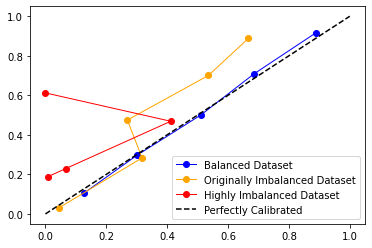

In [13]:
from sklearn.calibration import calibration_curve
import matplotlib.pyplot as plt

#Plot all calibration curves for strategy = 'uniform' (It is uniform by default)
prob_true_balanced,prob_pred_balanced = calibration_curve(y_test1,y_pred_proba1,strategy='uniform')
prob_true_imbalanced,prob_pred_imbalanced = calibration_curve(y_test2,y_pred_proba2,strategy='uniform')
prob_true_highly_imbalanced,prob_pred_highly_imbalanced = calibration_curve(y_test3,y_pred_proba3,strategy='uniform')

fig, ax = plt.subplots()
# only these two lines are calibration curves
plt.plot(prob_true_balanced,prob_pred_balanced, marker='o', linewidth=1, color='blue', label='Balanced Dataset')
plt.plot(prob_true_imbalanced,prob_pred_imbalanced, marker='o', linewidth=1, color='orange',label='Originally Imbalanced Dataset')
plt.plot(prob_true_highly_imbalanced,prob_pred_highly_imbalanced, marker='o', color='red',linewidth=1, label='Highly Imbalanced Dataset')
plt.plot([0, 1], [0, 1], linestyle='--',color='black',label='Perfectly Calibrated')
plt.legend()

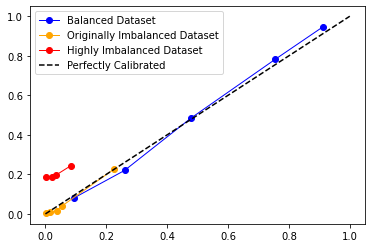

In [14]:
#Plot all calibration curves for strategy = 'quantile'
prob_true_balanced,prob_pred_balanced = calibration_curve(y_test1,y_pred_proba1,strategy='quantile')
prob_true_imbalanced,prob_pred_imbalanced = calibration_curve(y_test2,y_pred_proba2,strategy='quantile')
prob_true_highly_imbalanced,prob_pred_highly_imbalanced = calibration_curve(y_test3,y_pred_proba3,strategy='quantile')

fig, ax = plt.subplots()
# only these two lines are calibration curves
plt.plot(prob_true_balanced,prob_pred_balanced, marker='o', linewidth=1, color='blue', label='Balanced Dataset')
plt.plot(prob_true_imbalanced,prob_pred_imbalanced, marker='o', linewidth=1, color='orange',label='Originally Imbalanced Dataset')
plt.plot(prob_true_highly_imbalanced,prob_pred_highly_imbalanced, marker='o', color='red',linewidth=1, label='Highly Imbalanced Dataset')
plt.plot([0, 1], [0, 1], linestyle='--',color='black',label='Perfectly Calibrated')
plt.legend()

Observing the plots above, the model trained on the balanced dataset seems to be very well calibrated (close to perfect calibration). This seems to be the best model in terms of calibration.

The uniform binning strategy is the better approach for visualizing the calibration curves. This strategy ensures the bin widths are equal. So, even if there are not many predicted probabilities that are high, these points will appear on the calibration plot. However, the quantile strategy tries to keep the same number of samples in every bin. As a result, if the model predicts very less no. of data points with high probabilities, these points will not show up on the calibration curve (the lines for imbalanced and highly imbalanced datasets do not extend much on our plot above). As a result, the uniform strategy seems to be better suited for visualizing calibration curves in this context. 

# Question 4: Deep Learning Mechanisms [5 points]

Briefly explain the motivation behind the following mechanisms commonly used in deep learning: <br>
a) **[2.5 pts]** Skip connections <br>
b) **[2.5 pts]** Batch normalization

### Answer:

**(a)** For understanding skip connections, we need to understand how backpropagation works. In backpropagation, the parameters in the network are updated in such a way that loss is minimized by calculating the gradient using chain rule. As a result of this, the gradient gets smaller, sometimes approaching to zero as we go towards earlier layers. Hence, due to weights approaching zero, the weights of earlier layers are not updated and this phenomenon is known as vanishing gradient. To counter this, the skip connections are used i.e. it skips the layers in the network by providing an alternative path. Due to the skip connections, a much smoother loss surface is obtained and model converges a lot faster than without skip connections. 
Skip connections are utilized in following two ways:
1. ResNet: In this case, skip connections are done through addition. The gradient is preserved as the backpropagation is done through the identity function by using vector addition
2. DenseNet: In this case, skip connections are done through concatenation. This process tries that maximum amount of information is flown between different layers through the concatenation of feature maps. This also ensures feature reusability.

**(b)**  As the name suggest, in Normalization, the inputs are normalized to helps model converge faster as the model parameters have a level playing field.  We know that in Neural Networks, different data in mini-batches is passed due to high the input distribution keeps on changing.The layers of deep network could be sensitive to the initial random weights, due to which it’s training becomes bit difficult. The reason can be that post the weight updating, “distribution of inputs” can change after each mini-batch. If we apply the concept of normalization in case of neural networks, it will help in normalizing mini-batches which will ultimately lead the model to converge faster. It stabilizes the learning process and reduces number of training epochs for training deep networks. This is because unwanted gradients occur if the model parameters have different values and normalization helps in avoiding such gradients, resulting in faster model convergence.